In [20]:
# import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../utils/')

sns.set_style("darkgrid")
from sklearn.metrics import confusion_matrix


In [6]:
def vectorized_result(j):

    y = np.zeros((10, 1))
    y[j] = 1.0
    return y


data = pd.read_csv('feat_25.csv', header=None)

X = np.array(data.iloc[:, :-1])
Y = np.array(data.iloc[:, -1], dtype=np.int32)
n = X.shape[0]
idx = np.arange(0, len(X))
np.random.shuffle(idx)
frac = int(0.8*len(X))
train_x = np.array([np.reshape(x, (-1, 1)) for x in X[idx[:frac]]])
train_y = [vectorized_result(y) for y in Y[idx[:frac]]]
train_data = list(zip(train_x, train_y))
test_x = np.array([np.reshape(x, (-1, 1)) for x in X[idx[frac:]]])
test_y = Y[idx[frac:]]
test_data = list(zip(test_x, test_y))

In [7]:
train_images = np.array([np.reshape(x, (5, 5)) for x in X[idx[:frac]]])
train_labels = np.array(Y[idx[:frac]])
test_images = np.array([np.reshape(x, (5, 5)) for x in X[idx[frac:]]])
test_labels = np.array(Y[idx[frac:]])

In [8]:
from tensorflow import keras

In [49]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(5,5)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(10, activation='softmax'),
                          ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=25,
                    validation_data=(test_images, test_labels))

Epoch 1/25
75/75 [==============================] - 1s 4ms/step - loss: 2.3610 - accuracy: 0.1167 - val_loss: 2.2024 - val_accuracy: 0.1717
Epoch 2/25
75/75 [==============================] - 0s 3ms/step - loss: 2.1002 - accuracy: 0.2658 - val_loss: 1.9845 - val_accuracy: 0.3083
Epoch 3/25
75/75 [==============================] - 0s 3ms/step - loss: 1.8302 - accuracy: 0.3983 - val_loss: 1.6705 - val_accuracy: 0.4867
Epoch 4/25
75/75 [==============================] - 0s 3ms/step - loss: 1.4923 - accuracy: 0.5550 - val_loss: 1.3145 - val_accuracy: 0.6450
Epoch 5/25
75/75 [==============================] - 0s 2ms/step - loss: 1.1566 - accuracy: 0.6750 - val_loss: 0.9979 - val_accuracy: 0.7267
Epoch 6/25
75/75 [==============================] - 0s 2ms/step - loss: 0.8938 - accuracy: 0.7467 - val_loss: 0.7954 - val_accuracy: 0.7800
Epoch 7/25
75/75 [==============================] - 0s 3ms/step - loss: 0.7243 - accuracy: 0.8025 - val_loss: 0.6709 - val_accuracy: 0.8117
Epoch 8/25
75/75 [==

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
history.history['val_accuracy']

[0.17166666686534882,
 0.3083333373069763,
 0.4866666793823242,
 0.6449999809265137,
 0.7266666889190674,
 0.7799999713897705,
 0.8116666674613953,
 0.8333333134651184,
 0.8366666436195374,
 0.8383333086967468,
 0.8500000238418579,
 0.8583333492279053,
 0.8633333444595337,
 0.8633333444595337,
 0.8700000047683716,
 0.871666669845581,
 0.871666669845581,
 0.8683333396911621,
 0.871666669845581,
 0.8799999952316284,
 0.8799999952316284,
 0.8766666650772095,
 0.8833333253860474,
 0.8849999904632568,
 0.8899999856948853]

In [46]:
history.history['accuracy']

[0.18708333373069763,
 0.40416666865348816,
 0.5537499785423279,
 0.668749988079071,
 0.7416666746139526,
 0.7854166626930237,
 0.8125,
 0.8412500023841858,
 0.856249988079071,
 0.8691666722297668,
 0.878333330154419,
 0.8829166889190674,
 0.8883333206176758,
 0.89083331823349,
 0.8966666460037231,
 0.8979166746139526,
 0.8999999761581421,
 0.8987500071525574,
 0.9066666960716248,
 0.9070833325386047,
 0.9066666960716248,
 0.909166693687439,
 0.9145833253860474,
 0.9154166579246521,
 0.9179166555404663,
 0.9179166555404663,
 0.9204166531562805,
 0.9225000143051147,
 0.925000011920929,
 0.9262499809265137,
 0.925000011920929,
 0.9300000071525574,
 0.9275000095367432,
 0.9333333373069763,
 0.934583306312561,
 0.9320833086967468,
 0.9333333373069763,
 0.9350000023841858,
 0.9379166960716248,
 0.9354166388511658,
 0.9399999976158142,
 0.9424999952316284,
 0.9416666626930237,
 0.9412500262260437,
 0.9429166913032532,
 0.9458333253860474,
 0.9441666603088379,
 0.9466666579246521,
 0.94999998

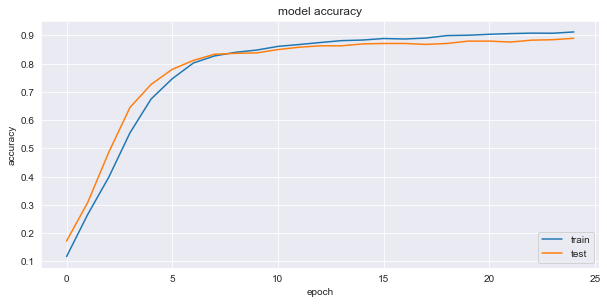

In [52]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

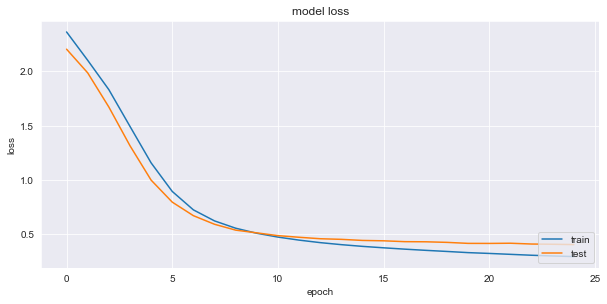

In [53]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')